In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes_new.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,110,92,0,0,37.6,0.191,30,0
1,10,168,74,0,0,38.0,0.537,34,1
2,10,139,80,0,0,27.1,1.441,57,0
3,1,189,60,23,846,30.1,0.398,59,1
4,5,166,72,19,175,25.8,0.587,51,1


In [4]:
df.shape

(758, 9)

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127643,0.147581,-0.072223,-0.066659,0.026350,-0.025851,0.548108,0.223672
Glucose,0.127643,1.000000,0.154026,0.057084,0.327275,0.227396,0.135845,0.257928,0.464733
BloodPressure,0.147581,0.154026,1.000000,0.210326,0.090558,0.301029,0.049618,0.237572,0.065059
SkinThickness,-0.072223,0.057084,0.210326,1.000000,0.433184,0.390775,0.182136,-0.117978,0.071456
Insulin,-0.066659,0.327275,0.090558,0.433184,1.000000,0.197372,0.189899,-0.049638,0.126453
BMI,0.026350,0.227396,0.301029,0.390775,0.197372,1.000000,0.130759,0.045409,0.305026
DiabetesPedigreeFunction,-0.025851,0.135845,0.049618,0.182136,0.189899,0.130759,1.000000,0.035033,0.168728
Age,0.548108,0.257928,0.237572,-0.117978,-0.049638,0.045409,0.035033,1.000000,0.232704
Outcome,0.223672,0.464733,0.065059,0.071456,0.126453,0.305026,0.168728,0.232704,1.000000


In [7]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [9]:
x_scaled

array([[ 0.04818885, -0.33934639,  1.18365052, ...,  0.70986375,
        -0.86131148, -0.27272174],
       [ 1.83000085,  1.48137909,  0.24803105, ...,  0.76101659,
         0.20149611,  0.06756316],
       [ 1.83000085,  0.57101635,  0.5599042 , ..., -0.6328983 ,
         2.97831132,  2.02420132],
       ...,
       [ 0.34515751,  0.00596362,  0.14407333, ..., -0.74799219,
        -0.69543978, -0.27272174],
       [-0.84271715,  0.16292271, -0.47967298, ..., -0.249252  ,
        -0.37598316,  1.17348908],
       [-0.84271715, -0.87300731,  0.04011561, ..., -0.21088737,
        -0.4804209 , -0.86822031]])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 150)

In [11]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[107  12]
 [ 29  42]]


In [13]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7842105263157895
Precision: 0.7777777777777778
Recall: 0.5915492957746479


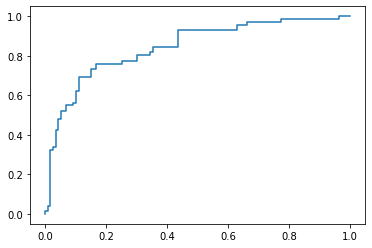

In [14]:
y_pred_probabilty = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probabilty)
auc = metrics.roc_auc_score(y_test, y_pred_probabilty)
plt.plot(fpr,tpr)

In [15]:
from sklearn.feature_selection import RFE

rfe = RFE(model1, 4)
fit = rfe.fit(x_train, y_train)

print(x.columns)
print(fit.ranking_)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[1 1 2 4 5 1 1 3]


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
x2 = df[['Pregnancies', 'Glucose', 'BloodPressure',"DiabetesPedigreeFunction"]]
y2 = df["Outcome"]

x2 = sc.fit_transform(x2)

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.25, random_state = 150)

model2 = LogisticRegression()
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

[[107  12]
 [ 28  43]]
Accuracy: 0.7894736842105263
Precision: 0.7818181818181819
Recall: 0.6056338028169014
